In [146]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
import random
%matplotlib inline

#Understanding the Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [147]:
def plot_features(trainset, testset=None, spc_feature = None):
  import matplotlib.pyplot as plt
  features = trainset.describe().columns.to_list()
  if testset is None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature is None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1
  elif testset is not None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature == None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          plt.hist(testset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.scatter(testset[i], testset[spc_feature],  color='red')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1

In [148]:
file_name_dataset = 'drug200.csv'
df = pd.read_csv(file_name_dataset)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [149]:
# One Hot Encoding
def onehot_encode(X):
  return pd.get_dummies(X)
# Label Encoding
def label_encode(X):
  return X.astype('category').cat.codes

In [150]:
#Convert categories to numbers
df['_Sex'] = label_encode(df['Sex'])
df['_BP'] = label_encode(df['BP'])
df['_Cholesterol'] = label_encode(df['Cholesterol'])
df['_Drug'] = label_encode(df['Drug'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,_Sex,_BP,_Cholesterol,_Drug
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0,1,0,2
196,16,M,LOW,HIGH,12.006,drugC,1,1,0,2
197,52,M,NORMAL,HIGH,9.894,drugX,1,2,0,3
198,23,M,NORMAL,NORMAL,14.020,drugX,1,2,1,3


In [151]:
df.describe()

,Age,Na_to_K,_Sex,_BP,_Cholesterol,_Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.910000,0.485000,2.870000
std,16.544315,7.223956,0.500854,0.821752,0.501029,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,1.000000,1.000000,0.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


In [152]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2).highlight_null(color='#f1f1f1')

<ipython-input-152-d65b0c965d28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,Na_to_K,_Sex,_BP,_Cholesterol,_Drug
Age,1.00,-0.06,0.10,0.05,-0.07,-0.00
Na_to_K,-0.06,1.00,-0.13,-0.15,0.01,0.59
_Sex,0.10,-0.13,1.00,-0.01,-0.01,-0.10
_BP,0.05,-0.15,-0.01,1.00,-0.14,0.37
_Cholesterol,-0.07,0.01,-0.01,-0.14,1.00,0.06
_Drug,-0.00,0.59,-0.10,0.37,0.06,1.00


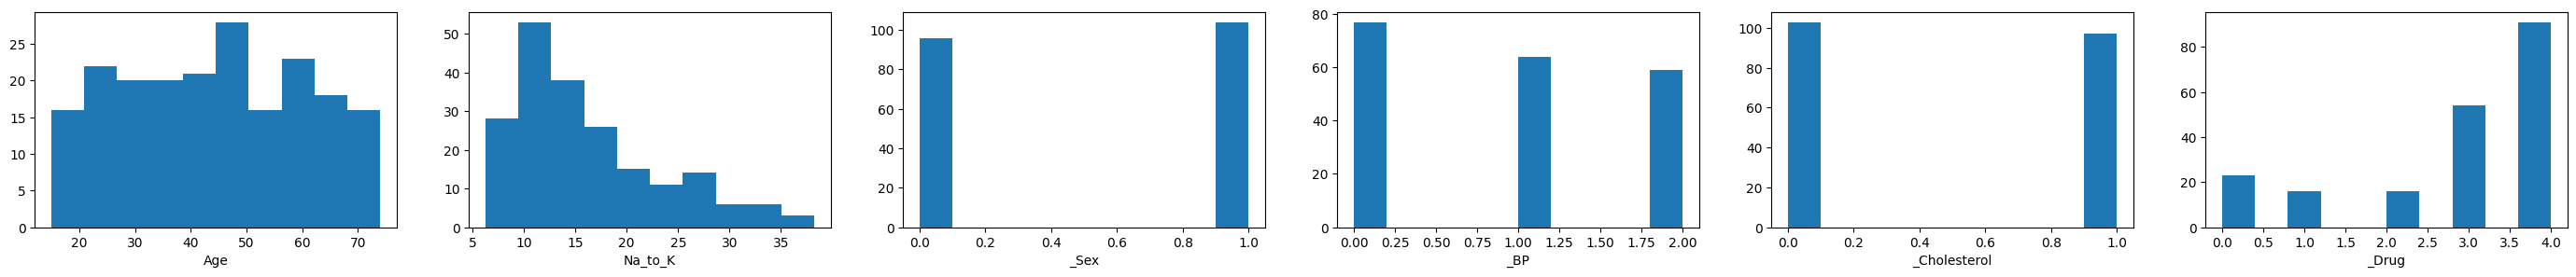

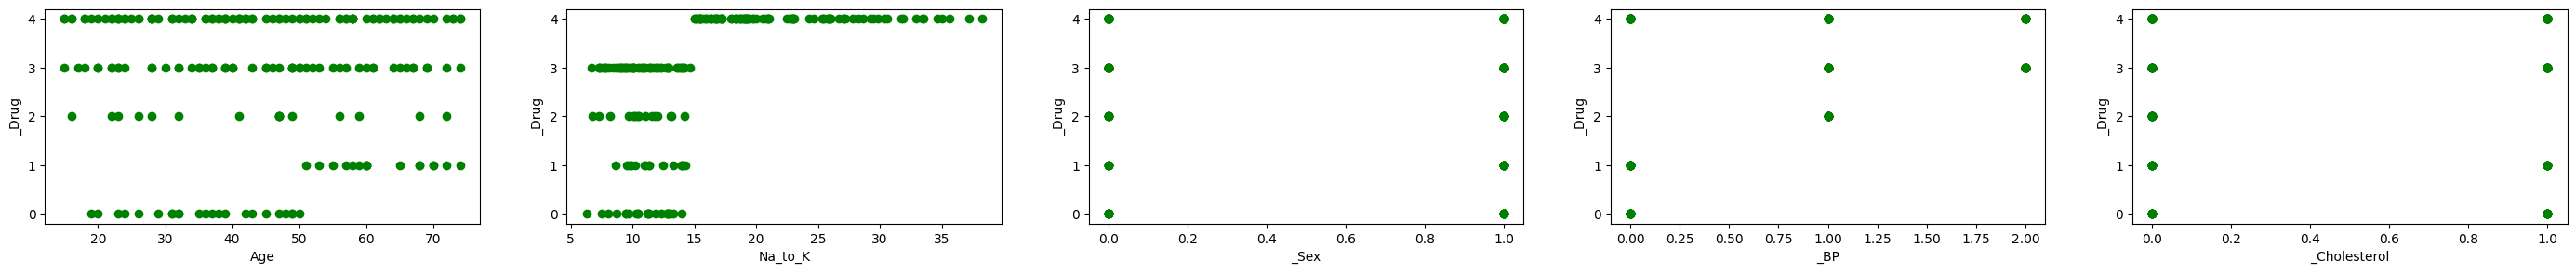

In [153]:
plot_features(df)
plot_features(df, spc_feature = '_Drug')

In [154]:
#select some features using for regression.
features_list = df.columns
data = df[features_list]
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,_Sex,_BP,_Cholesterol,_Drug
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


#Creating train and test dataset

In [192]:
#Create 2 sets: train set and test set
#create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(data)) < 0.8 #select random rows (< 80% of len(df))
print('number of rows in df: ',len(data))
print('number of values in msk: ',len(msk))
print('number of True in msk: ',msk.sum(),'ratio: ',msk.sum()/len(msk))
print('number of False in msk: ',(~msk).sum(),'ratio: ',(~msk).sum()/len(msk))
#np.random.rand(n) => n random values [0,1) => condition: random values > 0.8 => True
train = data[msk] #cdf of True
test = data[~msk] #~msk: True => False and False => True, cdf[~msk]: cdf of False

number of rows in df:  200
number of values in msk:  200
number of True in msk:  163 ratio:  0.815
number of False in msk:  37 ratio:  0.185


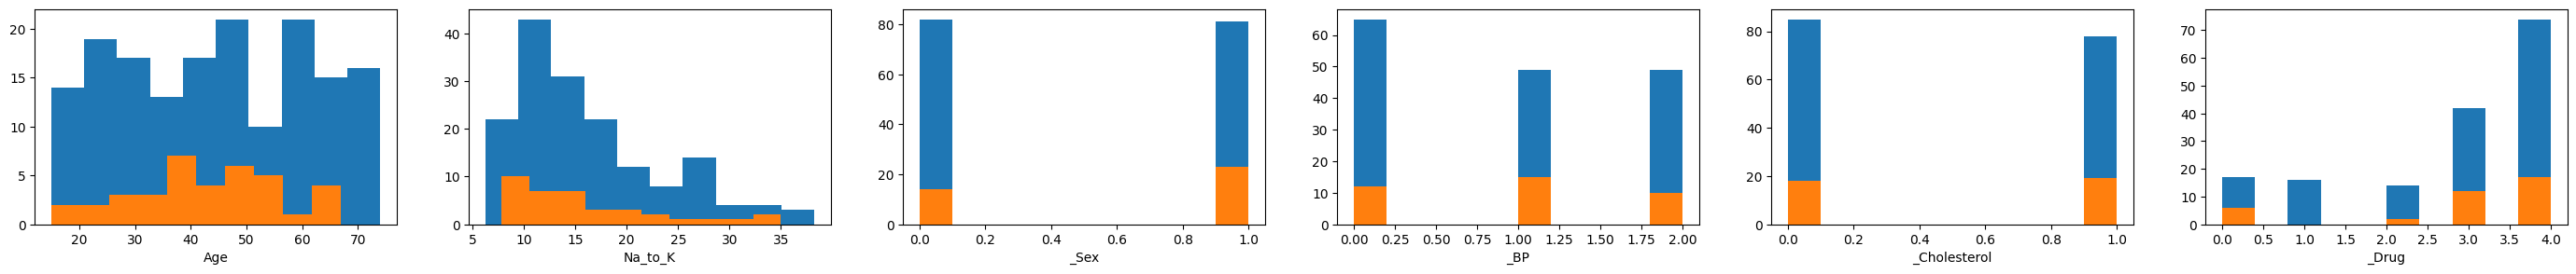

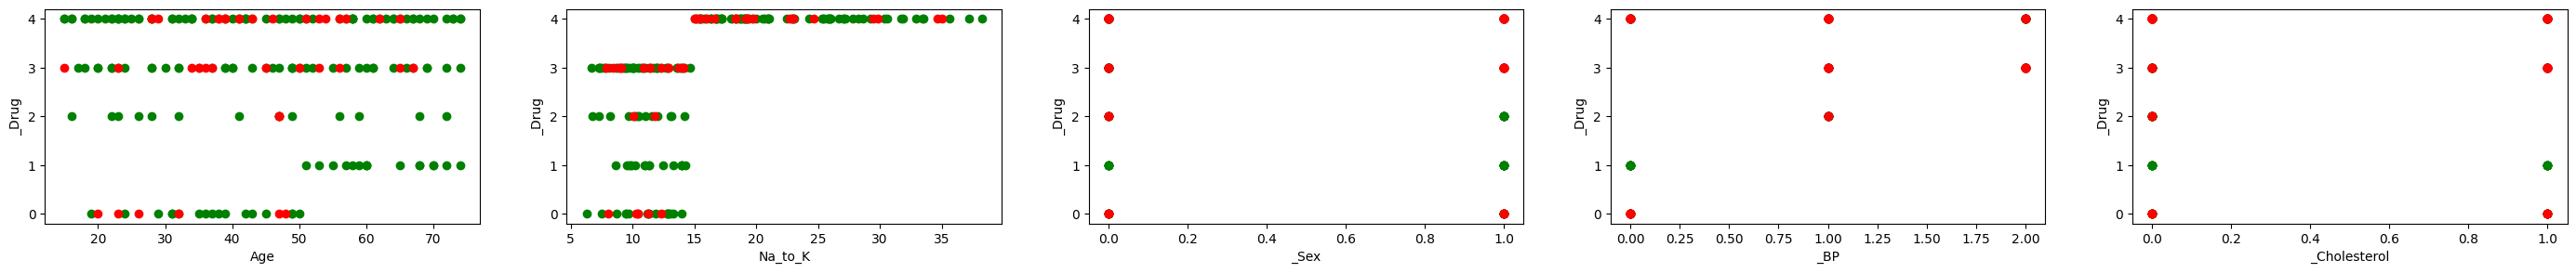

In [193]:
plot_features(train[features_list], test[features_list])
plot_features(train[features_list], test[features_list] ,spc_feature = '_Drug')

#Modeling

**Gaussian Distribution**

$f(x) = \frac{1}{σ\sqrt{2π}}e^{-\frac{1}{2σ^2}(x-μ)^2}$

$-∞<x<∞$

$μ$: mean

$σ^2$: variance

$\left\{
\begin{array}{cc}
P(C_j|X)=\frac{P(X|C_j)*P(C_j)}{P(X)} \\
P(X|C_j) = \prod P(X_i|C_j) \\
P(X)=∑P(C_j).P(X_i|C_j)
\end{array}
\right. $
$\rightarrow P(C_j|X)=\frac{P(C_j)*\prod P(X_i|C_j)}{∑P(C_j).P(X_i|C_j)}$
$\rightarrow P(C_j|X) = ??? \Leftrightarrow \left\{
\begin{array}{cc}
P(X_i|C_j) = ??? \\
P(C_j) = ???
\end{array}
\right. $

For discrete variable: **Bernoulli Naïve Bayes Classifier**
$P(X=x|C=c) = \frac{P(C=c \cap X=x)}{P(C=c)}$

For continuous variable(numerical variable): **Gaussian Naïve Bayes Classifier**
$P(X=x|C=c) = \frac{1}{σ_c\sqrt{2π}}e^{-\frac{1}{2σ^2_c}(x-μ_c)^2}$

##Classification

In [194]:
class Classifier:
  def __init__(self,data,Y_variable):
    self._data = data
    self._Y_variable = Y_variable
    self.Data_preparation()

  def Data_preparation(self):
    self.discrete_features = [feature for feature in self._data.columns if self._data[feature].dtype == 'O']
    discrete_new_df = self._data[self.discrete_features]
    self.continuous_features = [feature for feature in self._data.columns if self._data[feature].dtype != 'O']
    continuous_new_df = self._data[self.continuous_features + [self._Y_variable]]

    #Extracting discrete_features
    result = discrete_new_df.copy()
    for feature in discrete_new_df.columns:
      if feature == self._Y_variable:
        P_feature = []
        for i in discrete_new_df[self._Y_variable]:
          P_feature.append(sum(discrete_new_df[self._Y_variable]==i)/len(discrete_new_df))
        result['P_'+feature] = P_feature
      else:
        if discrete_new_df[feature].dtype == 'O':
          P_feature = []
          for row_id in range(len(discrete_new_df)):
            df_f = discrete_new_df.iloc[row_id:row_id+1]
            P_f_Y = sum((discrete_new_df[feature] == df_f[feature].values[0]) & (discrete_new_df[self._Y_variable] == df_f[self._Y_variable].values[0]))
            P_Y = sum(discrete_new_df[self._Y_variable] == df_f[self._Y_variable].values[0])
            P_feature.append(P_f_Y/P_Y)
          result['P_'+feature+'_'+self._Y_variable] = P_feature
    self.discrete_table = result.drop_duplicates()

    #Extracting continuous_features
    mean_var_list = []
    columns_name = []
    for feature in list(filter(lambda item: item != self._Y_variable, continuous_new_df .columns)):
      columns_name.append(feature+'_mean')
      mean_var_list.append(continuous_new_df .groupby(self._Y_variable)[feature].mean().values)
      columns_name.append(feature+'_variance')
      mean_var_list.append(continuous_new_df .groupby(self._Y_variable)[feature].var().values)
    self.mean_var_table = pd.DataFrame(mean_var_list).transpose()
    self.mean_var_table.columns = columns_name
    self.mean_var_table[self._Y_variable] = continuous_new_df[self._Y_variable].unique().tolist()

    return self.discrete_features, self.discrete_table, self.continuous_features, self.mean_var_table

  def pedict(self, test_data) :
    #Extracting discrete_features
    new_data = {}
    discrete_data = test_data[list(filter(lambda item: item != self._Y_variable, self.discrete_features))]
    for feature in discrete_data.columns:
      P_feature = []
      for row in range(len(discrete_data)):
        P_row = {}
        for label in test_data[self._Y_variable].unique():
          for f in test_data[feature].unique():
            if sum((self.discrete_table[feature] == f) & (self.discrete_table[self._Y_variable] ==label)) != 0:
              P = self.discrete_table[(self.discrete_table[feature] == f) & (self.discrete_table[self._Y_variable] ==label)]['P_'+feature+'_'+self._Y_variable].values[0]
            else:
              P = 1e-6
            P_row[label] = P
        P_feature.append(P_row)
      new_data[feature] = P_feature

    #Extracting continuous_features
    continuous_data = test_data[self.continuous_features]
    for feature in continuous_data.columns:
      P_feature = []
      for row in range(len(continuous_data)):
        P_row = {}
        for label in test_data[self._Y_variable].unique():
          mean = self.mean_var_table[self.mean_var_table[self._Y_variable]==label][feature+'_mean'].values[0]
          val = self.mean_var_table[self.mean_var_table[self._Y_variable]==label][feature+'_variance'].values[0]
          x = continuous_data[feature].iloc[row]
          P = (1/(np.sqrt(val)*np.sqrt(2*np.pi)))*(np.exp((-(x-mean)**2)/(2*val)))
          P_row[label] = P
        P_feature.append(P_row)
      new_data[feature] = P_feature

    #Creating dataframes used for probability calculation
    #For Y variable (label)
    P_Y_ = pd.DataFrame(self.discrete_table.groupby(self._Y_variable)['P_'+self._Y_variable].mean()).transpose()
    P_Y = pd.DataFrame(np.repeat(P_Y_.to_numpy(), test_data.shape[0], axis=0), columns=P_Y_.columns)
    #For X variable (features)
    X_C = {}
    for feature in test_data.columns[:-1]:
      X_C['P_'+feature+'_'+Y_variable] = pd.DataFrame(new_data[feature])
    #Calculating conditional probability
    numerator = P_Y
    denominator = 0
    for x in X_C.keys():
      numerator *= X_C[x]
      denominator += (X_C[x]*P_Y)
    result = numerator/denominator
    #Prediction
    predict = test_data.copy()
    Y_hat = []
    for row in range(len(result)):
      Y_hat.append(result.iloc[row].idxmax())
    predict[self._Y_variable+'_hat'] = Y_hat
    return predict

In [195]:
train_data = train[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']].reset_index(drop=True)
test_data = test[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']].reset_index(drop=True)
Y_variable = 'Drug'

model = Classifier(train_data,Y_variable)

In [196]:
#Prediction
result1 = model.pedict(train_data)
result1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_hat
0,23,F,HIGH,HIGH,25.355,drugY,drugB
1,47,M,LOW,HIGH,13.093,drugC,drugX
2,47,M,LOW,HIGH,10.114,drugC,drugX
3,28,F,NORMAL,HIGH,7.798,drugX,drugX
4,61,F,LOW,HIGH,18.043,drugY,drugY


In [201]:
#Evaluate classifier model for train test
sum([(result1.iloc[row]['Drug'] == result1.iloc[row]['Drug_hat']) for row in range(len(result1))])/len(result1)

0.50920245398773

## Evaluating

In [202]:
#Prediction
result = model.pedict(test_data)
result.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_hat
0,43,M,LOW,NORMAL,19.368,drugY,drugY
1,47,F,LOW,HIGH,11.767,drugC,drugA
2,57,M,LOW,NORMAL,19.128,drugY,drugY
3,39,F,LOW,NORMAL,22.697,drugY,drugY
4,53,M,NORMAL,HIGH,14.133,drugX,drugY


In [203]:
#Evaluate classifier model for test test
sum([(result.iloc[row]['Drug'] == result.iloc[row]['Drug_hat']) for row in range(len(result))])/len(result)

0.6216216216216216